Create plot for full ensemble of SLR projections for 3 SSPs

Ensemble contains a range of ESMs and ISMs

Computation is done with and without feedback

In [1]:
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt

import sys
sys.path.append('../src')
import utils as ut


In [2]:
ds = xr.open_dataset('../data/dummy.nc')
ds = ds.isel(exp=slice(0,5))
#ds = ds.drop_sel(esm='CAS-ESM2-0',ism=['PISM_DMI','IMAU_UU'])
ds = ds.drop_sel(ism='PISM_DMI')

In [3]:
mpl.rcParams['figure.subplot.wspace'] = .1
mpl.rcParams['figure.subplot.left'] = .1
mpl.rcParams['figure.subplot.right'] = .99
mpl.rcParams['figure.figsize'] = (7,3)

In [4]:
#ds = ds.isel(esm=[0,1],ism=[0,1])
bmps = ['lin','quad']
bmps_long = ['linear basal melt','quadratic basal melt']
niter = 1

In [5]:
slr_nf = np.zeros((len(bmps),len(ds.ssp),len(ds.esm)*len(ds.ism),len(ds.time)))
slr_wf = np.zeros((len(bmps),len(ds.ssp),len(ds.esm)*len(ds.ism),len(ds.time)))

In [6]:
for b,bmp in enumerate(bmps):
    for s,ss in enumerate(ds.ssp.values):
        for e,es in enumerate(ds.esm.values):
            for i,ii in enumerate(ds.ism.values):
                idx = e*len(ds.ism)+i
                TMP,IML,SLR = ut.iterate(ds,ism=ii,esm=es,ssp=ss,bmp=bmp,niter=niter)
                slr_nf[b,s,idx,:] = np.sum(SLR[0,:,:],axis=1)
                slr_wf[b,s,idx,:] = np.sum(SLR[-1,:,:],axis=1)
                print(f'{bmp:4s}',ss,f'{es:14s}',f'{ii:10s}',f'{slr_nf[b,s,idx,-1]:.3f}',f'{slr_wf[b,s,idx,-1]:.3f}')       

lin  126 ACCESS-CM2     CISM_NCA   0.043 0.074
lin  126 ACCESS-CM2     FETI_ULB   0.061 0.129
lin  126 ACCESS-CM2     GRIS_LSC   0.024 0.033
lin  126 ACCESS-CM2     IMAU_UU    0.131 0.252
lin  126 ACCESS-CM2     ISSM_UCI   0.121 0.181
lin  126 ACCESS-CM2     MALI_DOE   0.072 0.130
lin  126 ACCESS-CM2     PISM_PIK   0.071 0.118
lin  126 ACCESS-CM2     SICO_ILTS  0.146 0.298
lin  126 ACCESS-ESM1-5  CISM_NCA   0.044 0.077
lin  126 ACCESS-ESM1-5  FETI_ULB   0.065 0.135
lin  126 ACCESS-ESM1-5  GRIS_LSC   0.021 0.030
lin  126 ACCESS-ESM1-5  IMAU_UU    0.139 0.276
lin  126 ACCESS-ESM1-5  ISSM_UCI   0.127 0.193
lin  126 ACCESS-ESM1-5  MALI_DOE   0.068 0.124
lin  126 ACCESS-ESM1-5  PISM_PIK   0.074 0.127
lin  126 ACCESS-ESM1-5  SICO_ILTS  0.142 0.287
lin  126 CAMS-CSM1-0    CISM_NCA   0.046 0.082
lin  126 CAMS-CSM1-0    FETI_ULB   0.064 0.132
lin  126 CAMS-CSM1-0    GRIS_LSC   0.028 0.042
lin  126 CAMS-CSM1-0    IMAU_UU    0.146 0.295
lin  126 CAMS-CSM1-0    ISSM_UCI   0.126 0.195
lin  126 CAMS

In [9]:
mpl.rcParams['figure.subplot.wspace'] = .1
mpl.rcParams['figure.subplot.left'] = .15
mpl.rcParams['figure.subplot.right'] = .99
mpl.rcParams['figure.figsize'] = (7,5)

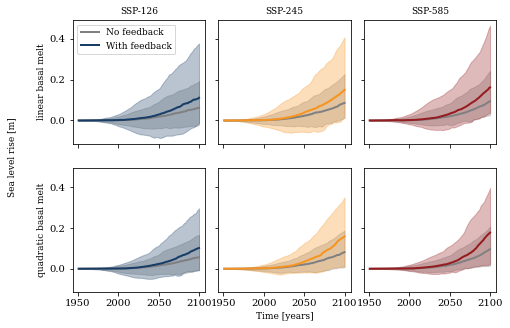

In [11]:
alpha = .3
perc = [10,90]

fig,ax = plt.subplots(2,3,sharex=True,sharey=True)
for b,bmp in enumerate(bmps):
    for s,ss in enumerate(ds.ssp.values):
        dax = ax[b,s]
        dax.plot(ds.time,np.median(slr_nf[b,s,:,:],axis=0),c='.5',lw=2,label='No feedback')
        dax.fill_between(ds.time,np.percentile(slr_nf[b,s,:,:],perc[0],axis=0),np.percentile(slr_nf[b,s,:,:],perc[1],axis=0),color='.5',alpha=alpha)

        dax.plot(ds.time,np.median(slr_wf[b,s,:,:],axis=0),c=ut.scol[ss],lw=2,label='With feedback')    
        dax.fill_between(ds.time,np.percentile(slr_wf[b,s,:,:],perc[0],axis=0),np.percentile(slr_wf[b,s,:,:],perc[1],axis=0),color=ut.scol[ss],alpha=alpha)
        if b==0:
            dax.set_title(f'SSP-{ss}')
    ax[b,0].set_ylabel(bmps_long[b])
            
ax[0,0].legend(loc='upper left')
fig.supylabel('Sea level rise [m]',fontsize=9)
ax[1,1].set_xlabel('Time [years]')

plt.savefig(f'../draftfigs/full_ensemble_{niter}.png',dpi=450)
plt.show()